## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv("poll.csv")

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
vote    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [7]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

Polls show Brown will win the elections

In [14]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [15]:
s = sample(0.51,n=1000)

In [17]:
s.vote.value_counts(normalize=True)

Green    0.51
Brown    0.49
Name: vote, dtype: float64

In [18]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

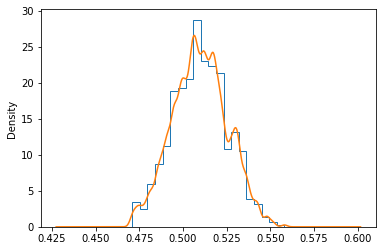

In [31]:
dist.Brown.hist(histtype='step',bins=20,density=True)
dist.Brown.plot.density(bw_method=0.1)

So looks like a True Brown fraction of 0.51, we may obtain any sample proportion from 0.48 to 0.55

Converse can be true also: The 0.51 that you observed may actually originate from a Green majority?

# Confidence Interval

* Built from the data
* Contains the true value of a population parameter XX% of the time
* Over many similar experiments

For example, if similar experiments are conducted a 100 times and a confidence interval is computed on the observed value from each experiment, then 95 out of those 100 confidence intervals would include the true value. Of course, we wouldn't which 95.

In [33]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

Let's say we want to go for the 95% confidence interval. This will lie between 2.5% quantile and 97.5% quantile.

In [34]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025),dist.Brown.quantile(0.975)